## Importações dos pacotes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from funcoes import plota_rel, thousand_formatter, million_formatter

In [18]:
casos = pd.read_csv('../dados_limpos/casos_obitos_hep')
vacinas = pd.read_csv('../dados_limpos/vacinas_hep')
dados_reg = pd.read_csv('../dados_limpos/casos_obitos_por_regiao')

In [19]:
dados_reg

,Ano,Classe_viral,Regiao,Casos,Obitos
0,2007,A,Norte,2548,9
1,2008,A,Norte,2440,11
2,2009,A,Norte,2569,5
3,2010,A,Norte,1902,10
4,2011,A,Norte,2733,5
...,...,...,...,...,...
139,2014,C,Sul,12327,1138
140,2015,C,Sul,14229,1142
141,2016,C,Sul,16377,1070
142,2017,C,Sul,14220,932


In [20]:
casos.head()

,Ano,Classe_viral,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k
0,2001,A,21011,NaN,172385826.0,12.188357,NaN
1,2001,B,8344,NaN,172385826.0,4.840305,NaN
2,2001,C,6713,NaN,172385826.0,3.894172,NaN
3,2002,A,14468,NaN,174632960.0,8.284805,NaN
4,2002,B,8841,NaN,174632960.0,5.062618,NaN


In [21]:
vacinas.head()

,Ano,Classe_viral,Vacinas
0,2001,A,41062
1,2002,A,58788
2,2003,A,68883
3,2004,A,85271
4,2005,A,100081


In [22]:
dados = pd.merge(casos, vacinas, on=['Ano', 'Classe_viral'], how='left')
dados.head()

,Ano,Classe_viral,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k,Vacinas
0,2001,A,21011,NaN,172385826.0,12.188357,NaN,41062.0
1,2001,B,8344,NaN,172385826.0,4.840305,NaN,35206019.0
2,2001,C,6713,NaN,172385826.0,3.894172,NaN,NaN
3,2002,A,14468,NaN,174632960.0,8.284805,NaN,58788.0
4,2002,B,8841,NaN,174632960.0,5.062618,NaN,30906741.0


In [23]:
dados.head()

,Ano,Classe_viral,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k,Vacinas
0,2001,A,21011,NaN,172385826.0,12.188357,NaN,41062.0
1,2001,B,8344,NaN,172385826.0,4.840305,NaN,35206019.0
2,2001,C,6713,NaN,172385826.0,3.894172,NaN,NaN
3,2002,A,14468,NaN,174632960.0,8.284805,NaN,58788.0
4,2002,B,8841,NaN,174632960.0,5.062618,NaN,30906741.0


In [24]:
help(plota_rel)

Help on function plota_rel in module funcoes:

plota_rel(dados: pandas.core.frame.DataFrame, x: str, y: str, hue=None, title='', subtitle=None, xlabel=None, ylabel=None, dict_hue_palette=None, formatter_x=None, formatter_y=None, file_name=None, xlim=None, ylim=None, hue_legend=None, style='darkgrid', show=True, ax=None, color_title='black', color_sub='dimgray', color_ticks='dimgray', legend=False, legend_title='', title_loc='left', kind='line', **kwargs)
    Função que plota um gráfico de relacionamento entre duas variáveis, podendo ser um 'lineplot' do seaborn ou um 'scatterplot' do seaborn
    
    Parâmentros:
    
            dados : DataFrame do pandas onde estão os dados, tipo=pd.DataFrame 
            x : coluna associada ao eixo x, tipo : str
            y : coluna associada ao eixo y, tipo : str
            hue : variável associada à tonalidade, tipo : str, padrão : None
            dict_hue_palette : dicionário com o nome da variável e a cor a ser plotada, tipo : dict, padrão

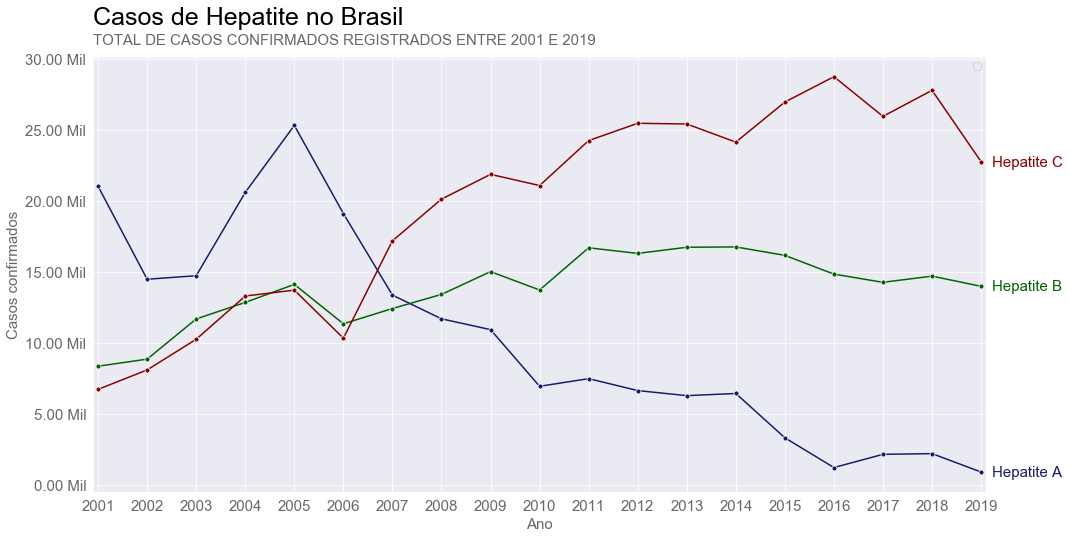

In [8]:
dict_palette = {'A': '#191970', 'B': '#006400', 'C': '#8B0000'}
plota_rel(dados, 'Ano', 'Casos', hue='Classe_viral', title='Casos de Hepatite no Brasil',
          subtitle='TOTAL DE CASOS CONFIRMADOS REGISTRADOS ENTRE 2001 E 2019',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], formatter_y=thousand_formatter, file_name='casos_hep', xlim=[2000.9, 2019.1],
          xlabel='Ano', ylabel='Casos confirmados', marker='.', markersize=10)

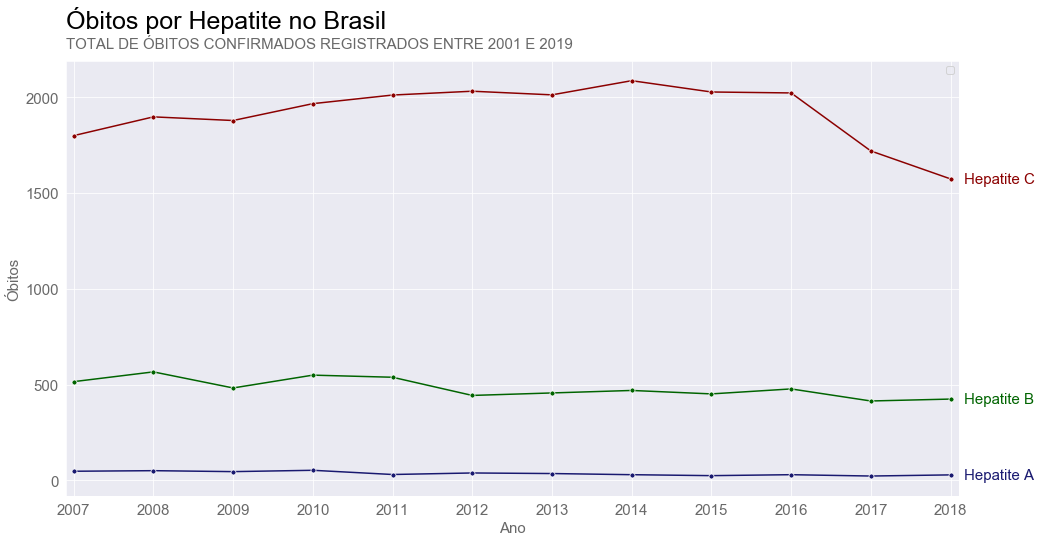

In [26]:
dict_palette = {'A': '#191970', 'B': '#006400', 'C': '#8B0000'}
plota_rel(dados.dropna(subset=['Obitos']), 'Ano', 'Obitos', hue='Classe_viral', title='Óbitos por Hepatite no Brasil',
             subtitle='TOTAL DE ÓBITOS CONFIRMADOS REGISTRADOS ENTRE 2001 E 2019',dict_hue_palette=dict_palette,xlabel='Ano', ylabel='Óbitos',
             hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='obitos_hep', xlim=[2006.9, 2018.1], marker='.', markersize=10)

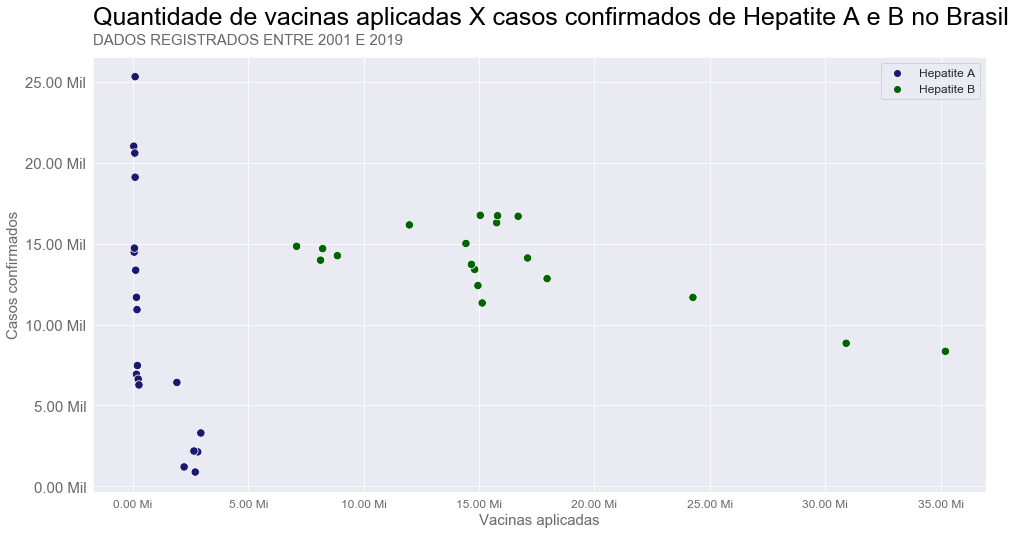

In [27]:
plota_rel(dados.query('Classe_viral == "A" or Classe_viral == "B"'), 'Vacinas', 'Casos',
          hue='Classe_viral',formatter_x=million_formatter, formatter_y=thousand_formatter,kind='scatter',
          title='Quantidade de vacinas aplicadas X casos confirmados de Hepatite A e B no Brasil',
          subtitle='DADOS REGISTRADOS ENTRE 2001 E 2019', color='#191970',
          dict_hue_palette=dict_palette, xlabel='Vacinas aplicadas', ylabel='Casos confirmados',
          hue_legend=['Hepatite A', 'Hepatite B'], legend=True, file_name='vacinaXcasos', s=70)

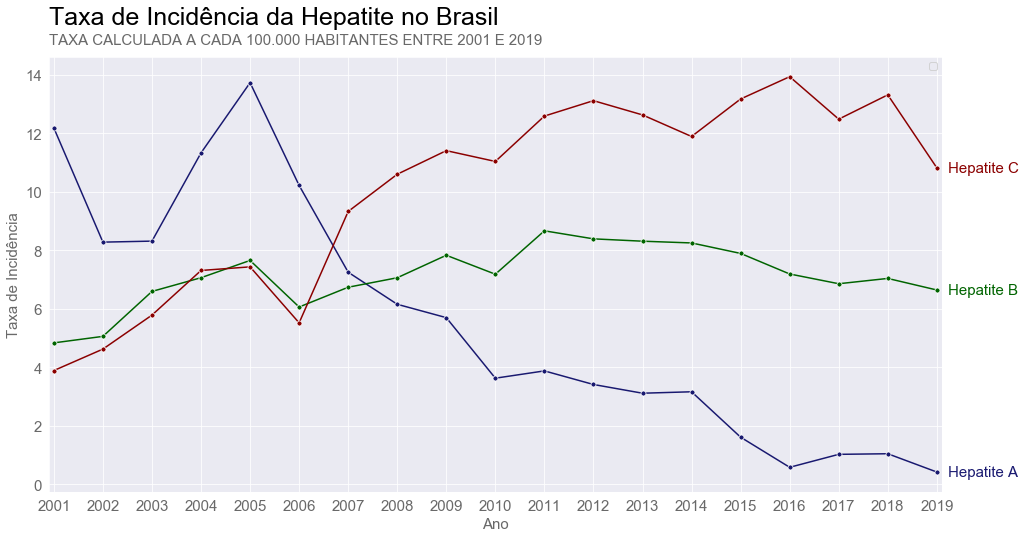

In [11]:
plota_rel(dados, 'Ano', 'taxa_incid_por100k', hue='Classe_viral', title='Taxa de Incidência da Hepatite no Brasil',
          subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES ENTRE 2001 E 2019',dict_hue_palette=dict_palette,
          xlabel='Ano', ylabel='Taxa de Incidência',
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_indic', xlim=[2000.9, 2019.1], marker='.', markersize=10)

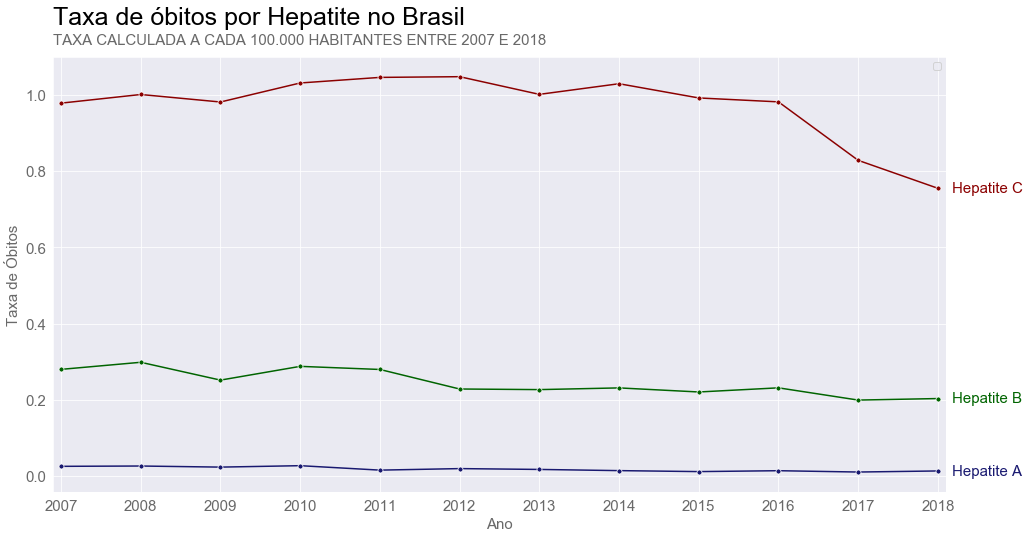

In [25]:
plota_rel(dados.dropna(subset=['taxa_obitos_por100k']), 'Ano', 'taxa_obitos_por100k', hue='Classe_viral', title='Taxa de óbitos por Hepatite no Brasil',
          subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES ENTRE 2007 E 2018',dict_hue_palette=dict_palette,xlabel='Ano', ylabel='Taxa de Óbitos',
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_obitos', xlim=[2006.9, 2018.1], marker='.', markersize=10)

In [28]:
dados_reg

,Ano,Classe_viral,Regiao,Casos,Obitos
0,2007,A,Norte,2548,9
1,2008,A,Norte,2440,11
2,2009,A,Norte,2569,5
3,2010,A,Norte,1902,10
4,2011,A,Norte,2733,5
...,...,...,...,...,...
139,2014,C,Sul,12327,1138
140,2015,C,Sul,14229,1142
141,2016,C,Sul,16377,1070
142,2017,C,Sul,14220,932
